# Test methods for analyzing images of singledoubletriple xs lines

## Initialization

In [2]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [3]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
sys.path.append(os.path.dirname(module_path))
from py.tools.config import cfg
import py.tools.logs as logs
import py.vid.v_tools as vt
import py.metrics.m_SDT as me
from py.im.imshow import imshow
import py.file.file_handling as fh
import py.vid.noz_detect as nt
import pandas as pd
LOGGERDEFINED = logs.openLog('still_measure.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

In [ ]:
folder = os.path.join(cfg.path.server, r'SDT\SO_S85-0.05\I_SO9-S85-0.05_S_3.00\I_SO9-S85-0.05_S_3.00_230512\disturbXS2_2_+y_0.500')
file = os.path.join(folder, 'disturbXS2_2_+y_0.500_vstill_HIx2_l1d2o2_I_SO9-S85-0.05_S_3.00_230512_122056_0.png')
vs = me.fileXSSDT(file, diag=1)

# test specific files

INFO: Threshold: 110, product: 22.9296, white:80


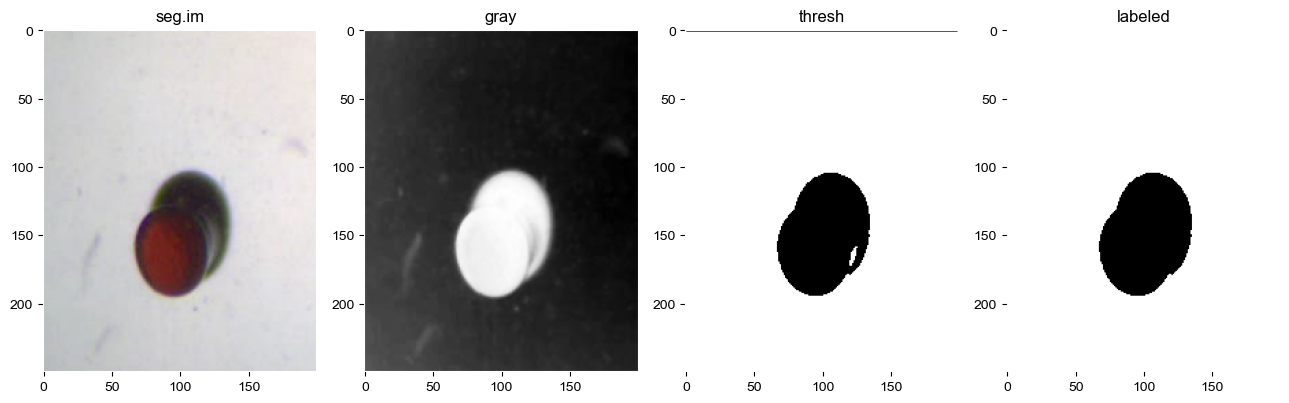

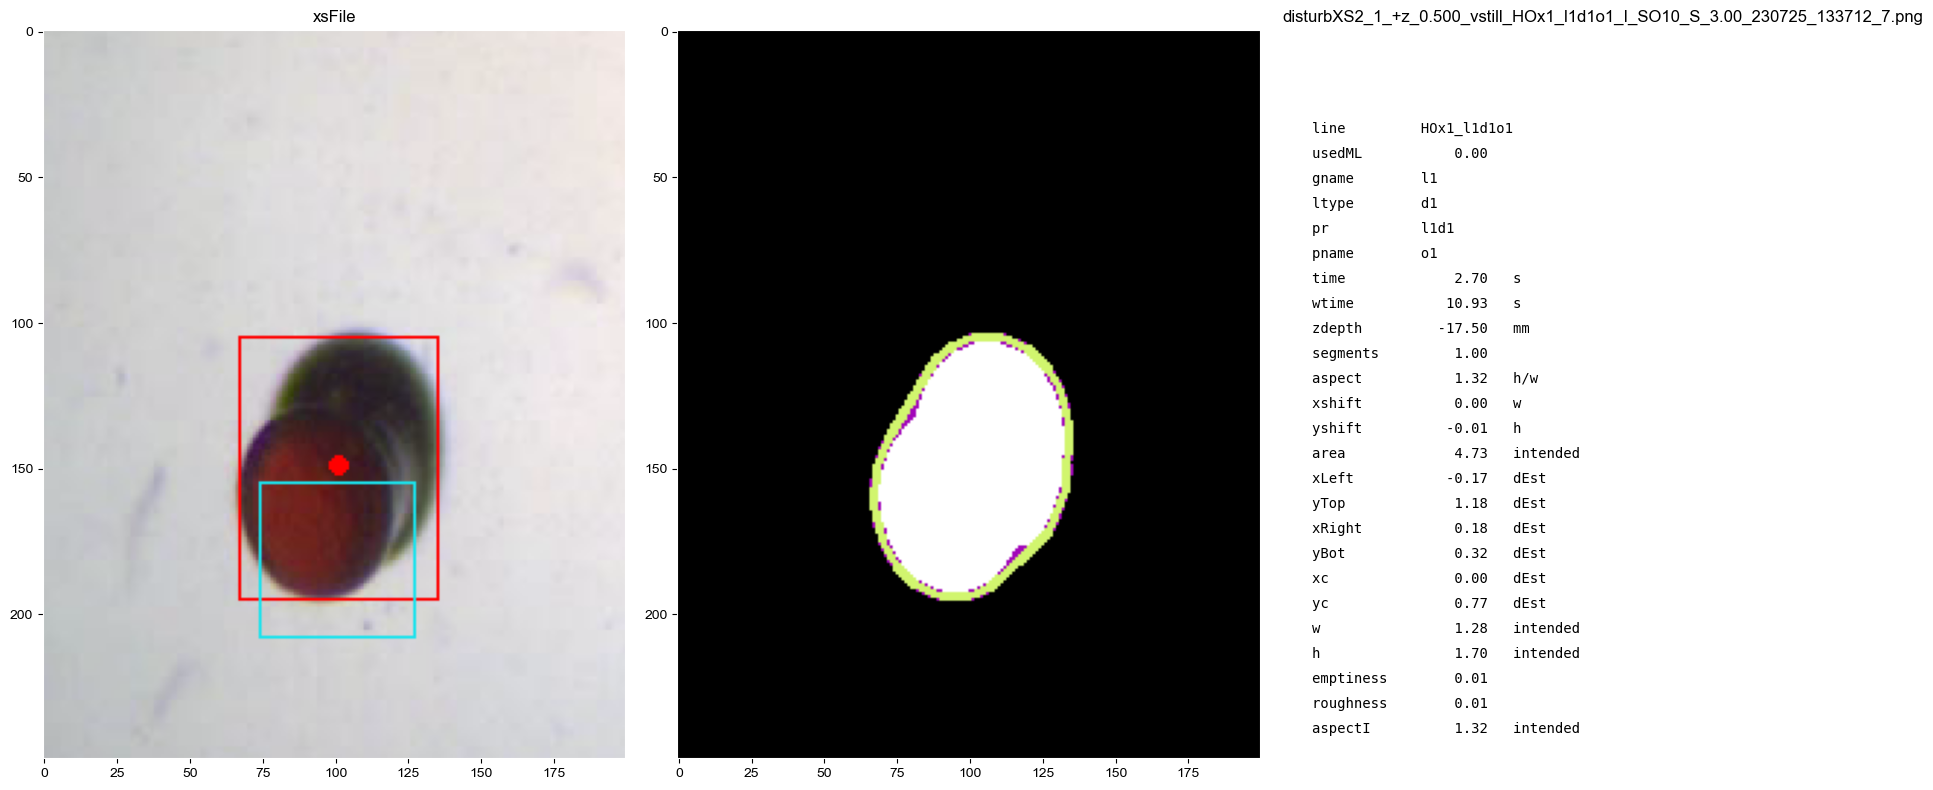

In [5]:
fstr = r'SDT\SO\I_SO10_S_3.00\I_SO10_S_3.00_230725\disturbXS2_1_+z_0.500'
fistr = r'disturbXS2_1_+z_0.500_vstill_HOx1_l1d1o1_I_SO10_S_3.00_230725_133712_7.png'
folder = os.path.join(cfg.path.server, fstr)
vs = me.fileXSSDT(os.path.join(folder, fistr), diag=2)

# create cases for unit test

In [5]:
tg = me.trainingGenerator(os.path.join(cfg.path.server, 'SDT')
                          , excludeFolders=[]
                          , mustMatch='disturbXS')

In [180]:
file = tg.randomFile()

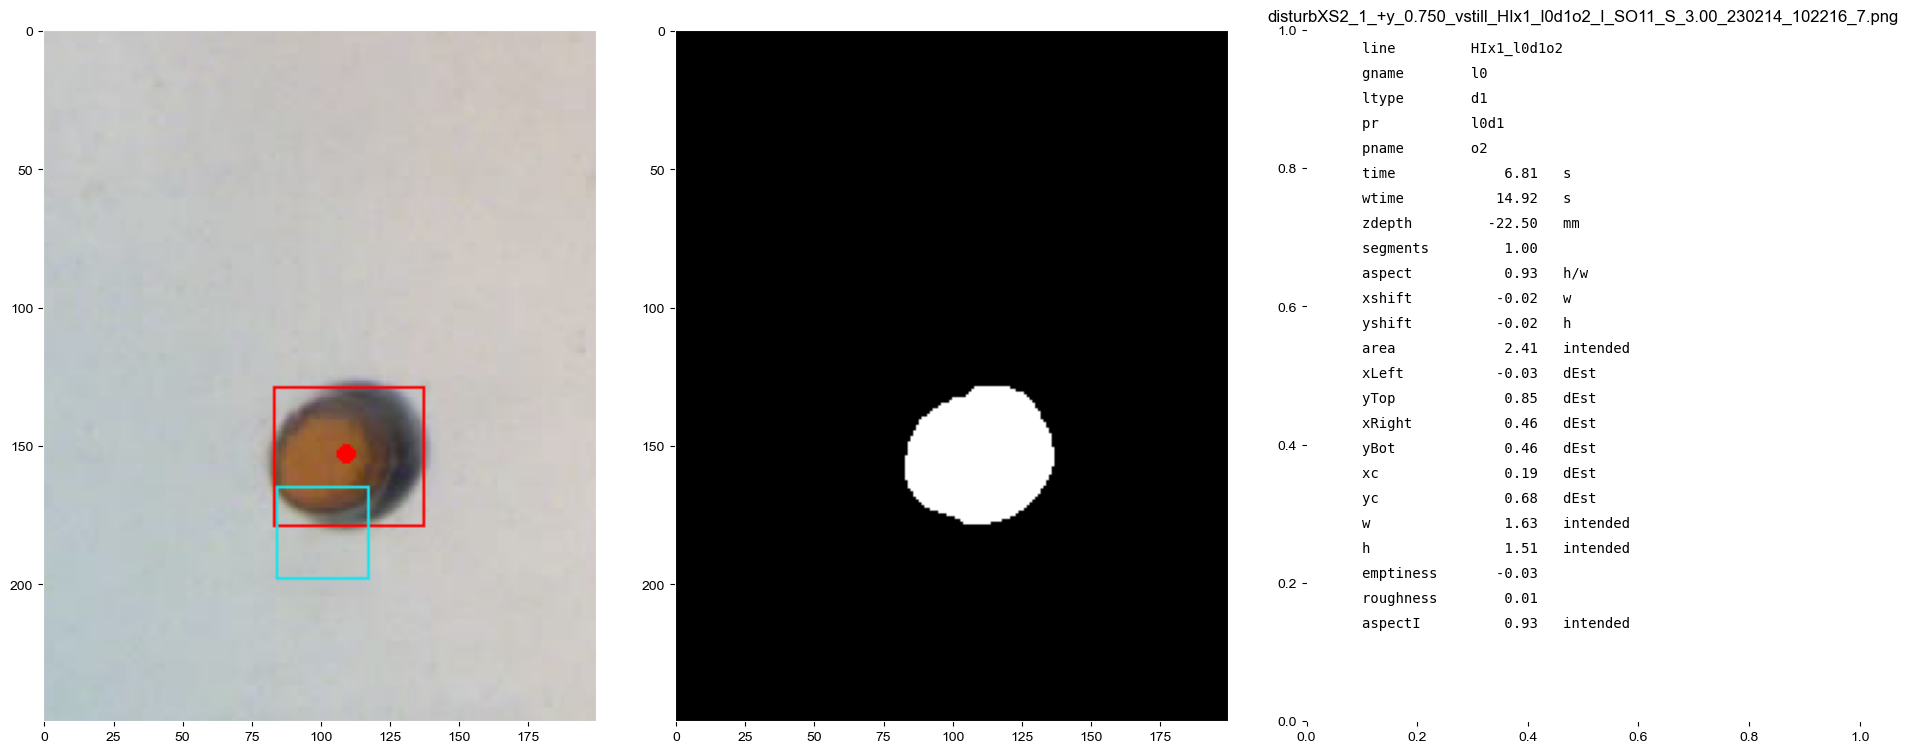

In [243]:
vs = me.fileXSSDT(file, diag=1)

In [183]:
vs.addToTestFile()

INFO: Exported C:\Users\lmf1\Documents\GitHub\embedded3DPvids\tests\test_SDTXS.csv


# unit test

.......................F........................
FAIL: runTest (test_SDTXS.TestSDTXS)
----------------------------------------------------------------------
AssertionError: False is not true : test_w failed in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\singleDoubleTriple\SO_S20-0.5\I_SO6-S20-0.5_S_4.00\I_SO6-S20-0.5_S_4.00_230215\disturbXS2_1_+y_0.750\disturbXS2_1_+y_0.750_vstill_HIx1_l0d1o1_I_SO6-S20-0.5_S_4.00_230215_173426_8.png: 23

----------------------------------------------------------------------
Ran 48 tests in 14.005s

FAILED (failures=1)


TEST 23 (excel row 25)
Folder: singleDoubleTriple\SO_S20-0.5\I_SO6-S20-0.5_S_4.00\I_SO6-S20-0.5_S_4.00_230215\disturbXS2_1_+y_0.750
File: disturbXS2_1_+y_0.750_vstill_HIx1_l0d1o1_I_SO6-S20-0.5_S_4.00_230215_173426_8.png


,w,h,xc,yc
expected,1.93239455,1.99278188,0.11830519,1.14451218
actual,2.03304010,2.01291099,0.16501997,1.09779740


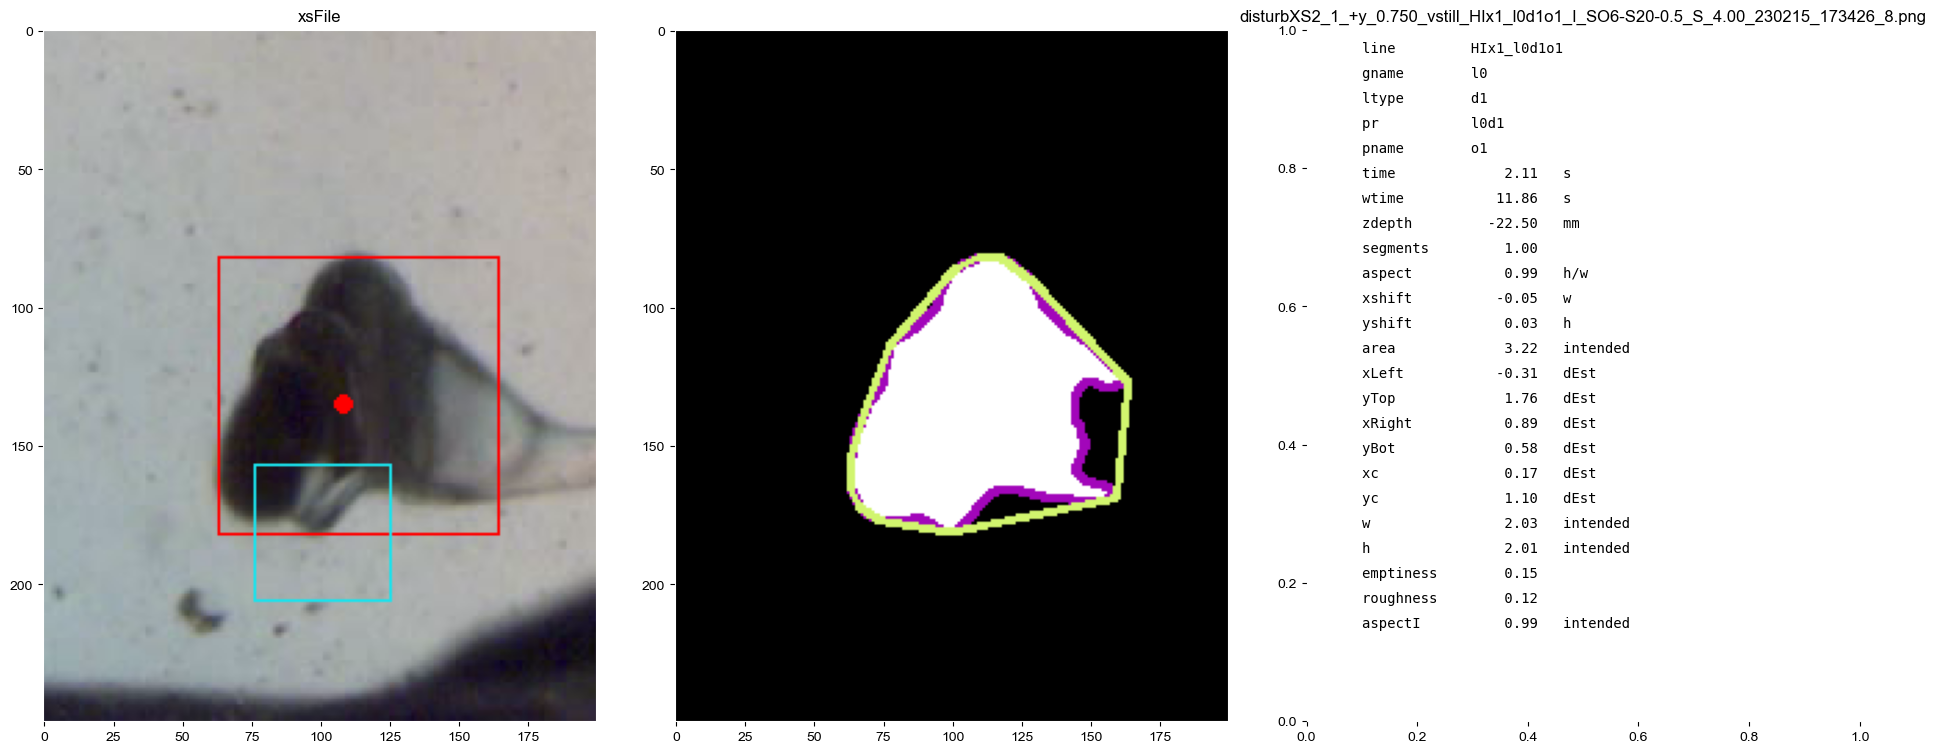

In [168]:
ut = me.unitTester('SDTXS', me.fileXSSDT)
ut.run()
ut.compareAll()

In [136]:
i = ut.failedFiles[8]
ut.compareTest(i)

IndexError: list index out of range

TEST 44 (excel row 46)
Folder: singleDoubleTriple\SO\I_SO9_S_3.00\I_SO9_S_3.00_230207\disturbXS2_1_+y_0.750
File: disturbXS2_1_+y_0.750_vstill_HIx1_l3d1_I_SO9_S_3.00_230207_111147_9.png
INFO: Exported C:\Users\lmf1\Documents\GitHub\embedded3DPvids\tests\test_SDTXS.csv


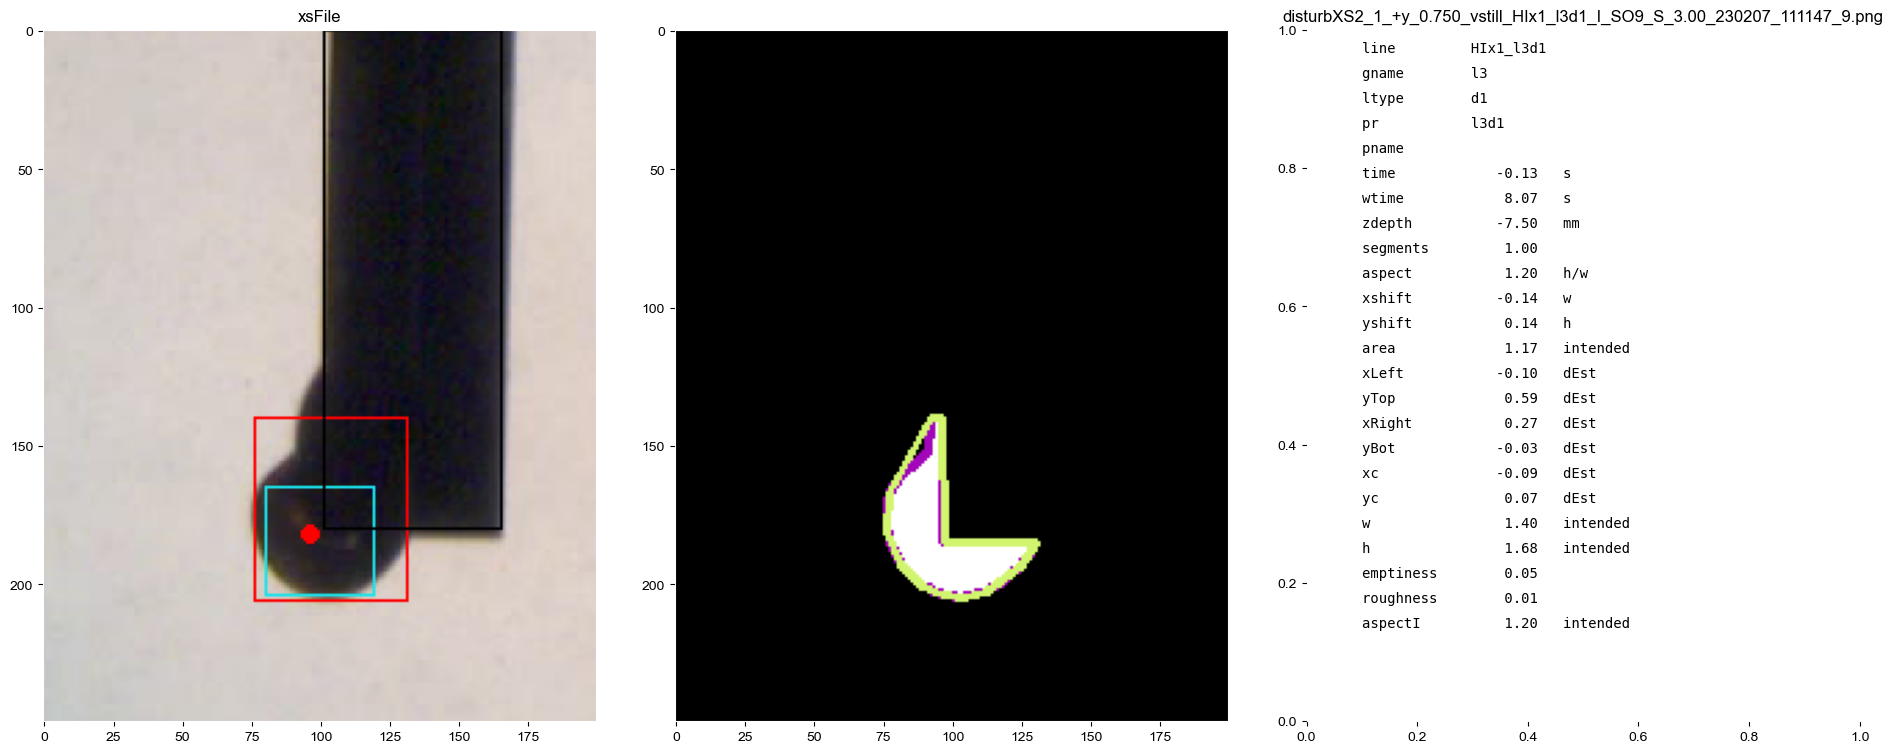

In [135]:
ut.keepTest(i)

In [ ]:
ut.keepAllTests()

In [101]:
ut.openCSV()

# test single folder

measure all files and summarize for a single folder

In [ ]:
from file_metric import whiteoutFile
fstr = r'SDT\SO\I_SO11_S_4.00\I_SO11_S_4.00_230214\disturbXS2_1_+z_0.500'
folder = os.path.join(cfg.path.server, fstr)
for f in os.listdir(folder):
    if 'l0' in f:
        whiteoutFile(os.path.join(folder, f))

In [6]:
fstr = r'SDT\SO\I_SO10_S_3.00\I_SO10_S_3.00_230725\disturbXS2_1_+z_0.500'
folder = os.path.join(cfg.path.server, fstr)
fv = me.folderXSSDT(folder, overwriteMeasure=True, overwriteSummary=True, diag=0)
fv.measureFolder();
fv.summarize();

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO\I_SO10_S_3.00\I_SO10_S_3.00_230725\disturbXS2_1_+z_0.500\disturbXS2_1_+z_0.500_failures_I_SO10_S_3.00_230725_133712_7.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO\I_SO10_S_3.00\I_SO10_S_3.00_230725\disturbXS2_1_+z_0.500\disturbXS2_1_+z_0.500_measure_I_SO10_S_3.00_230725_133712_7.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO\I_SO10_S_3.00\I_SO10_S_3.00_230725\disturbXS2_1_+z_0.500\disturbXS2_1_+z_0.500_summary_I_SO10_S_3.00_230725_133712_7.csv


# change pressure model

In [25]:
folders = [os.path.join(cfg.path.server, 'SDT', r'SO_S85-0.05', f'I_SO8-S85-0.05_S_{j}') for j in ['3.00', '3.50', '4.00']]
fc = me.fitChanger(folders, 0, 0.023351, -3.81362)
fc.run()

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S85-0.05\I_SO8-S85-0.05_S_3.00\I_SO8-S85-0.05_S_3.00_230511\disturbHoriz3_1_0.500\disturbHoriz3_1_0.500_timeRewrite_I_SO8-S85-0.05_S_3.00_230511_142400_1.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S85-0.05\I_SO8-S85-0.05_S_3.00\I_SO8-S85-0.05_S_3.00_230511\disturbHoriz3_1_0.500\disturbHoriz3_1_0.500_flagFlip_I_SO8-S85-0.05_S_3.00_230511_142400_1.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S85-0.05\I_SO8-S85-0.05_S_3.00\I_SO8-S85-0.05_S_3.00_230511\disturbHoriz3_1_0.500\disturbHoriz3_1_0.500_progPos_I_SO8-S85-0.05_S_3.00_230511_142400_1.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S85-0.05\I_SO8-S85-0.05_S_3.00\I_SO8-S85-0.05_S_3.00_230511\disturbHoriz3_1_0.500\disturbHoriz3_1_0.500_progDims_I_SO8-S85-0.05_S_3.00_230511_142400_1.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3

[{'folder': '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\SDT\\SO_S85-0.05\\I_SO8-S85-0.05_S_4.00\\I_SO8-S85-0.05_S_4.00_230511\\disturbVert2_3_1.000',
  'error': ValueError('Mismatch in write lines: 10 found, 12 programmed')}]

In [6]:
folders = os.path.join(cfg.path.server, r'SDT')
fc = me.fitChanger(folders)
fc.run()

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_3.00\I_SO7-S20-0.5_S_3.00_230509\disturbHoriz3_1_0.500\disturbHoriz3_1_0.500_meta_I_SO7-S20-0.5_S_3.00_230509_114810_4.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_3.00\I_SO7-S20-0.5_S_3.00_230509\disturbHoriz3_1_0.500\disturbHoriz3_1_0.500_timeRewrite_I_SO7-S20-0.5_S_3.00_230509_114810_4.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_3.00\I_SO7-S20-0.5_S_3.00_230509\disturbHoriz3_1_0.500\disturbHoriz3_1_0.500_flagFlip_I_SO7-S20-0.5_S_3.00_230509_114810_4.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_3.00\I_SO7-S20-0.5_S_3.00_230509\disturbHoriz3_1_0.500\disturbHoriz3_1_0.500_progPos_I_SO7-S20-0.5_S_3.00_230509_114810_4.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopb

[{'folder': '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\SDT\\SO_S85-0.05\\I_SO9-S85-0.05_S_4.00\\I_SO9-S85-0.05_S_4.00_230512\\disturbVert2_3_0.750',
  'error': KeyError('r2')},
 {'folder': '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\SDT\\SO_S85-0.05\\I_SO9-S85-0.05_S_4.00\\I_SO9-S85-0.05_S_4.00_230512\\disturbVert2_3_0.875',
  'error': KeyError('r2')},
 {'folder': '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\SDT\\SO_S85-0.05\\I_SO9-S85-0.05_S_4.00\\I_SO9-S85-0.05_S_4.00_230512\\disturbVert2_3_1.250',
  'error': KeyError('r2')}]